In [5]:
# Importing libs
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Creating a DataFrame with the CSV database
df_daily_top_10 = pd.read_csv('./dataset_eda/netflix_daily_top_10.csv')

In [7]:
# Showing the first 10 lines of the DataFrame
df_daily_top_10.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


### Showing the available data types

In [8]:
# Showing the available data types
df_daily_top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


### Showing the analysis period

In [9]:
# Showing the start of the analysis period
pd.to_datetime(df_daily_top_10['As of']).dt.date.min()

datetime.date(2020, 4, 1)

Start: 2020/04/01

In [10]:
# Showing the end of the analysis period
pd.to_datetime(df_daily_top_10['As of']).dt.date.max()

datetime.date(2022, 3, 11)

End: 2022/03/11

### Showing database size

In [11]:
# Showing the database size
df_daily_top_10

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


Size: 7100 rows and 10 columns

### Checking null values

In [12]:
# Checking null values
df_daily_top_10.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

### Showing outliers

Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

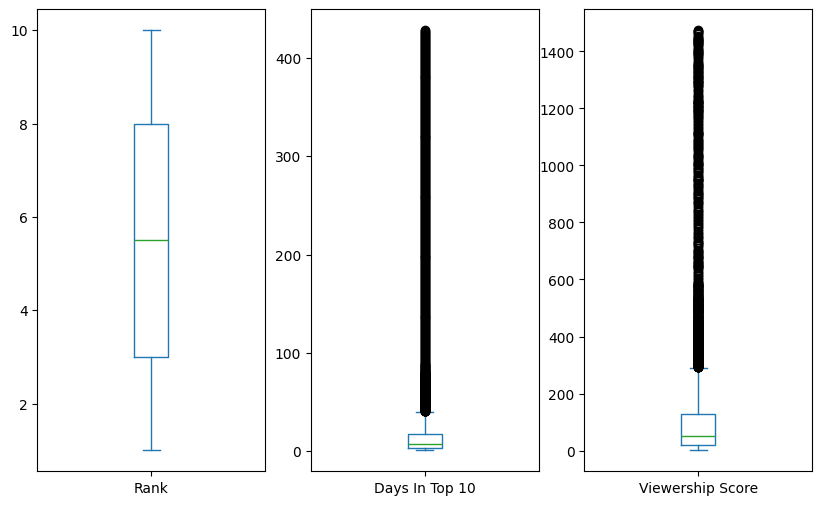

In [13]:
# Viewing Outliers
df_daily_top_10.plot(kind='box', figsize=(10, 6), subplots=True)

#### Showing outliers from 'Days In Top 10' column

Days In Top 10    Axes(0.125,0.11;0.775x0.77)
dtype: object

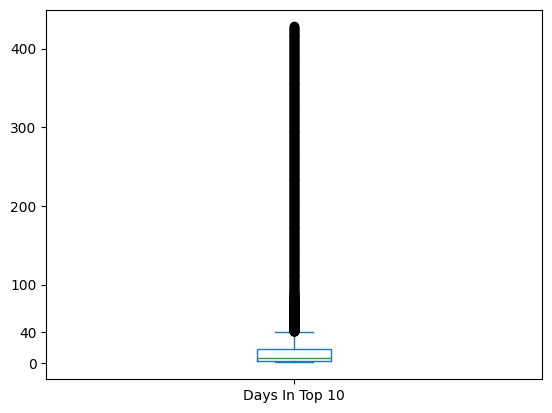

In [14]:
# Viewing 'Days In Top 10' outliers
df_daily_top_10['Days In Top 10'].plot(kind='box', subplots=True, yticks=[0, 40, 100, 200, 300, 400])

By adding the argument `figsize=(1, 45)` on the command above I could see where the outliers start with precision, with no need of calculations.

They start at **41**.

In [15]:
# Showing the outliers (based only on visual perception)
df_daily_top_10[df_daily_top_10['Days In Top 10'] > 40]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,"Jul 21, 2017",41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,"Jul 21, 2017",42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,"Jul 21, 2017",43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,"Jul 21, 2017",44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,"Apr 15, 2020",41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,"Feb 13, 2020",43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",45,306


Anyways, I decided to calculate it below, just to be sure.

In [16]:
# Calculating 'Days In Top 10' outliers more precisely
# Q1 = 25% of data
# Q3 = 75% of data
# IQR (Interquartile Range) = Q3 - Q1
# Lower bound = Q1 - (1.5 * IQR)
# Upper bound = Q3 + (1.5 * IQR)

# Calcs for quartiles and IQR from 'Days In Top 10' column
q1 = df_daily_top_10['Days In Top 10'].quantile(0.25)
q3 = df_daily_top_10['Days In Top 10'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Showing limits
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}\n')

# Identifying and showing the outliers from 'Days In Top 10' column
outliers = df_daily_top_10[(df_daily_top_10['Days In Top 10'] > upper_bound) | (df_daily_top_10['Days In Top 10'] < lower_bound)]
print(f'Outliers: {outliers[['Days In Top 10']]}')

Lower bound: -19.5
Upper bound: 40.5

Outliers:       Days In Top 10
438               41
447               42
458               43
489               44
629               41
...              ...
7053              42
7063              43
7074              44
7085              45
7094              46

[743 rows x 1 columns]


There are **743 outliers** in the 'Days In Top 10' column.

#### Showing outliers from 'Viewership Score' column
_Only with calcs_

In [17]:
# Calculating 'Viewership Score' outliers
# Q1 = 25% of data
# Q3 = 75% of data
# IQR (Interquartile Range) = Q3 - Q1
# Lower bound = Q1 - (1.5 * IQR)
# Upper bound = Q3 + (1.5 * IQR)

# Calcs for quartiles and IQR from 'Viewership Score' column
q1 = df_daily_top_10['Viewership Score'].quantile(0.25)
q3 = df_daily_top_10['Viewership Score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Showing limits
print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}\n')

# Identifying and showing the outliers from 'Days In Top 10' column
outliers = df_daily_top_10[(df_daily_top_10['Viewership Score'] > upper_bound) | (df_daily_top_10['Viewership Score'] < lower_bound)]
print(f'Outliers: {outliers[['Viewership Score']]}')

Lower bound: -144.5
Upper bound: 291.5

Outliers:       Viewership Score
236                292
247                295
255                300
269                301
2382               296
...                ...
7008               344
7063               295
7074               301
7085               306
7094               312

[698 rows x 1 columns]


There are **698 outliers** in the 'Days In Top 10' column.